# $$\text{Diffusion Maps}$$

## Framework

Given

* $\{x_1, x_2, \cdots, x_n\} \in \mathbb{R}^d$ as data set
* $s$, We choose the distance between one point to its s-nearest neighbor point as the scaling parameter

I use the following steps to perform diffusion maps.

### 1. Construct the Affinity Matrix K

Define a Guassian kernel matrix $K$ with entries
$$K_{ij} := \exp(\frac {-\||x_{i} - x_{j}||^{2}} {\sigma^2})$$
where $\sigma$ is the median distance between each point and its s-nearest neighbor.

### 2. Construct Diffusion matrix $Q$

Define a $N\times N$ diagonal matrix $D$ with entries
$$D_{ii} := \sum^{n}_{j=1}K_{ij}$$
Then we construct the matrix Q
$$Q := D^{-\frac{1}{2}}KD^{-\frac{1}{2}}$$

### 3. Mapping to diffsuion Space

Apply eigen-decomposion to Diffusion matrix.
$$Q = U\Lambda U^T = 
\begin{bmatrix}
| & & | \\
v_1&\cdots&v_n \\
| & & | \\
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & & \\
& \ddots & \\
& & \lambda_n \\
\end{bmatrix}
\left[ \begin{array}{c}
--v_1^T-- \\
\vdots \\
--v_n^T-- \\
\end{array} \right]
$$

The eigenvectors of **p.d.f. matrix** is: $\psi_i = D^{-\frac{1}{2}} v_i$

We only need the first **4** largest eignevalues and corresponding eigenvectors.

Then the coordinates in Diffusion Space can be described as below
$$M = \begin{bmatrix}
| & | & | \\
\lambda_2\psi_2 & \lambda_3\psi_3 & \lambda_4\psi_4 \\
| & | & | \\
\end{bmatrix}$$


### 1. Import libraries

In [1]:
%pylab inline
from scipy.io import loadmat
from scipy.spatial.distance import squareform, pdist
from scipy.sparse.linalg import svds
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 2. Load datas

In [2]:
orig = loadmat('datas/data4.mat')

datas = orig['data']
n, d = datas.shape
print(f'{n} datas in {d}-dimension')

1000 datas in 3-dimension


### 3. Define functions

In [3]:
def diffusion_mapping(datas):
    K = get_K(datas)
    D, Q = get_DnQ(K)
    M = mapping(D, Q)
    return M

#### 3.1 Construct affinity matrix

In [4]:
def get_K(data):
    Dis = squareform(pdist(data))
    Dis_sort = sort(Dis,1)

    Dis = Dis ** 2
    K = Dis / (percentile(Dis_sort[:, s+1], 50) ** 2)
    K = exp(-K)
    return K

#### 3.2 Construct Rowsum matrix and Diffusion matrix

In [5]:
def get_DnQ(K):
    D = diag(1 / sqrt( sum(K, axis=1) ))
    Q = D.dot(K).dot(D)
    return D, Q

#### 3.3 Mapping to Diffusion Space
The result of svds is same to that of eigs and faster, so I use svds instead of eigs.

In [6]:
def mapping(D, Q):
    U, S, _ = svds(Q, 4)
    pval = diag(S[::-1])
    pvec = D.dot(U[:, ::-1])
    
    M = real( pvec.dot(pval) )
    return M

#### 3.4 Display functions

In [7]:
def showfig_orig():
    if d == 2:
        fig, ax = plt.subplots(figsize=fig_size)
        ax.scatter(datas[:, 0], datas[:, 1], s=5)
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(f'Orginal datas, n={n}')
        plt.show()
    elif d == 3:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(datas[:, 0], datas[:, 1], datas[:, 2], s=5)
        ax.set_title('Data in diffusion space (3d)')
        plt.show()
    
def showfig_2():
    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(M[:,1], M[:,2], s=3)
    ax.set_title('Data in diffusion space (2d)')
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

def showfig_3():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(M[:, 1], M[:, 2], M[:, 3], s=5)
    ax.set_title('Data in diffusion space (3d)')
    plt.show()

### 4. Set parameters

In [8]:
np.random.seed(404)
s = 3

### 5. Compute the Diffusion Maps

In [9]:
M = diffusion_mapping(datas)

### 6. Display all results

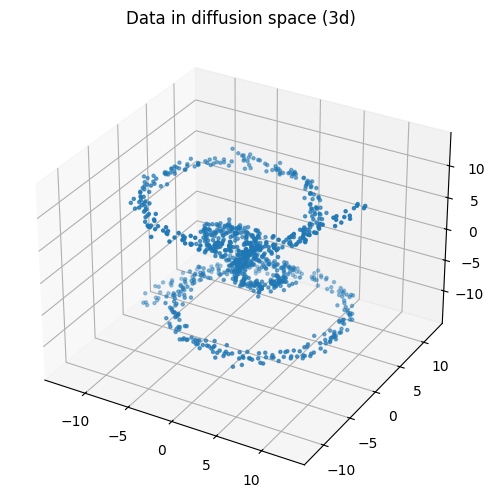

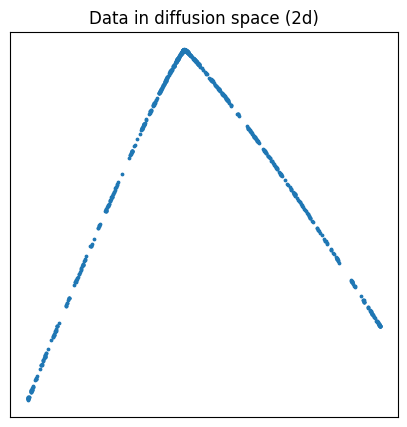

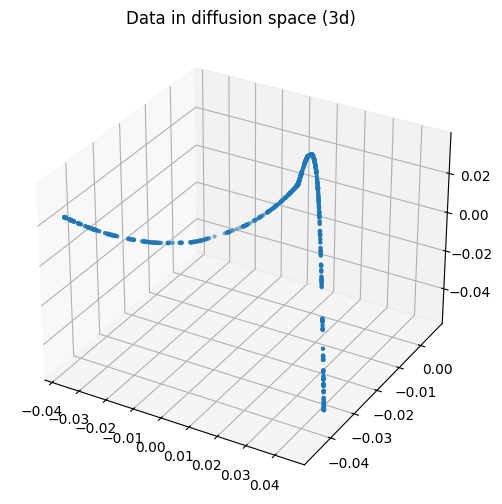

In [10]:
fig_size = (5, 5)
showfig_orig()
showfig_2()
showfig_3()